#  **Loan Eligibility Prediction**


######   Name : Priyanshu Goyal

######   Section : A

######   University Roll No : 2014787 

##   About The Project : 

#####    This project involves predicting whether a loan should be given to an individual based on certain features such as gender, marital status, education, self-employeement, income, credit-history, loan-amount, loan-amount-term, dependents, propery_area. First, using   the given data, we try to build a machine learning model, and then use it to predict, whether a loan should be approved for a  person given his/her data.

## Importing necessary packages, libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Loading the csv loan dataset into a dataframe

In [4]:
dataset = pd.read_csv("F:\m_p\Loan-Eligibility-Prediction\dataset\data.csv")

## Exploring the dataset

In [5]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:

# Checking the shape of the dataset
dataset.shape

(614, 13)

In [7]:

# single instance example from the dataset
dataset.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [8]:
# see the attributes of the dataset
dataset.head(0)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [9]:

# see the datatype of the dataset attributes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:

## Check if any null values exist in the datset
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
dataset['Gender'].value_counts(normalize="true")

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [12]:
dataset['Married'].value_counts(normalize="true")

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

In [13]:
dataset['Dependents'].value_counts(normalize="true")

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

In [14]:
dataset['Education'].value_counts(normalize="true")

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

In [15]:
dataset['Self_Employed'].value_counts(normalize="true")

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

In [16]:
dataset['Property_Area'].value_counts(normalize="true")

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='count'>

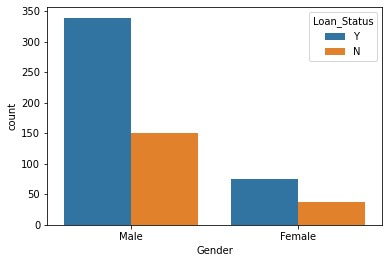

In [17]:
## finding relationship between loan_status and Gender
sb.countplot(x='Gender', hue='Loan_Status', data = dataset)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

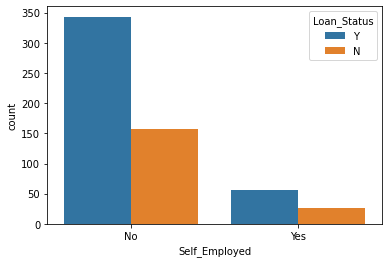

In [18]:
sb.countplot(x='Self_Employed', hue='Loan_Status', data = dataset)

<AxesSubplot:xlabel='Education', ylabel='count'>

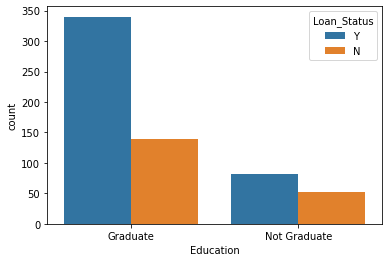

In [19]:
## finding relationship between loan_status and Education
sb.countplot(x='Education', hue='Loan_Status', data = dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

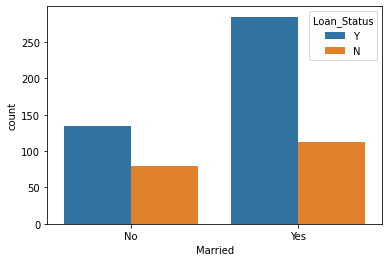

In [20]:
## finding relationship between loan_status and Married
sb.countplot(x='Married', hue='Loan_Status', data = dataset)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

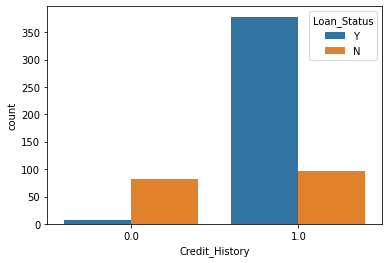

In [21]:
## finding relationship between laon_status and Credit_History
sb.countplot(x='Credit_History', hue='Loan_Status', data = dataset)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

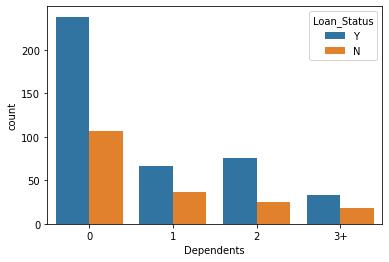

In [22]:
## finding relationship between loan_status and Dependents
sb.countplot(x='Dependents', hue='Loan_Status', data = dataset)

In [23]:
## visualizing numerical variables


<AxesSubplot:xlabel='LoanAmount'>

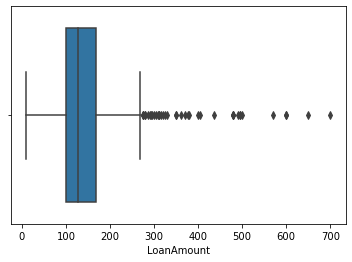

In [24]:
sb.boxplot(x=dataset["LoanAmount"])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

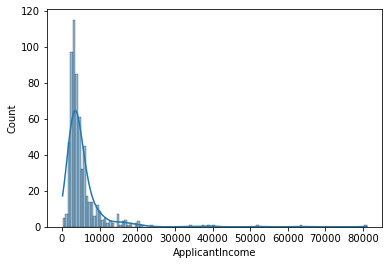

In [25]:
sb.histplot(data=dataset, x="ApplicantIncome", kde=True)

<AxesSubplot:xlabel='ApplicantIncome'>

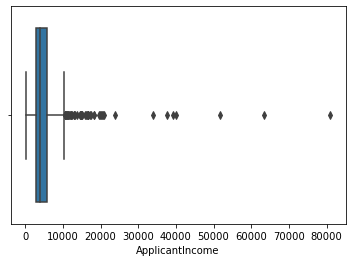

In [26]:
sb.boxplot(x=dataset["ApplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

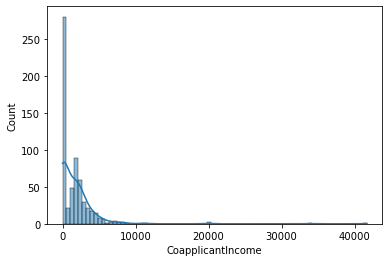

In [27]:
sb.histplot(data=dataset, x="CoapplicantIncome", kde=True)

<AxesSubplot:xlabel='CoapplicantIncome'>

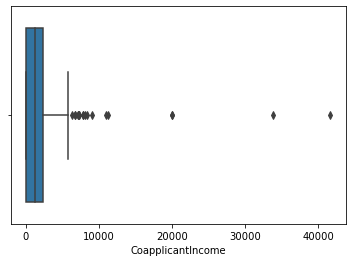

In [28]:
sb.boxplot(x=dataset["CoapplicantIncome"])

<AxesSubplot:>

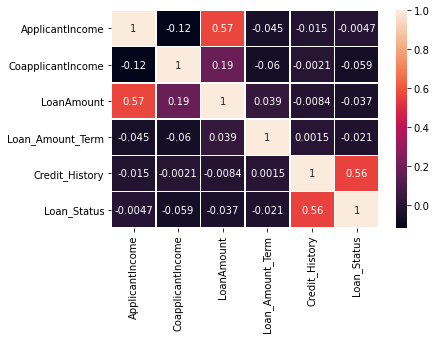

In [29]:
## finding the correlation among the attributes

# for finding correlation, we convert Loan_Status into a numerical variable i.e. replace yes with 1, No with 04
dataset['Loan_Status'].replace({'Y':1, 'N':0}, inplace = True)

sb.heatmap(dataset.corr(), annot = True, linewidths=0.5)

## Preprocessing the data

In [30]:
# gender is a categorical variable, so fill missing values with mode
pre_dataset = dataset

In [31]:
## as above we saw, that there are many missing values, so we replace categorical_values with their mode, numerical attributes
## with their 

In [32]:
## gender has 13 missing values
pre_dataset['Gender'].fillna(pre_dataset['Gender'].mode()[0], inplace = True)

In [33]:
## married has 3 missing values
pre_dataset['Married'].fillna(pre_dataset['Married'].mode()[0], inplace = True)

In [34]:
## Self_Employed has 32 missing values
pre_dataset['Self_Employed'].fillna(pre_dataset['Self_Employed'].mode()[0], inplace = True)

In [35]:
## Credit_History has 50 missing values
pre_dataset['Credit_History'].fillna(pre_dataset['Credit_History'].mode()[0], inplace = True)

In [36]:
## Dependents has 15 missing values
pre_dataset['Dependents'].fillna(pre_dataset['Dependents'].mode()[0], inplace = True)

In [37]:
## LoanAmount has 22 missing values, as it has outliers also, so we replace with median
pre_dataset['LoanAmount'].fillna(pre_dataset['LoanAmount'].median(), inplace = True)

In [38]:
## Loan_Amount_Term has 14 missing values, nut it has many common values, as we can see below
pre_dataset['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [39]:
## so, as we can see above that it has one value repeated the most(512), so we replace it with this value, i.e. with its mode

In [40]:
pre_dataset['Loan_Amount_Term'].fillna(pre_dataset['Loan_Amount_Term'].mode()[0], inplace = True)

In [41]:
## check null values
pre_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [42]:
## after replacing missing values, dataset is as follows
pre_dataset.head(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1


In [43]:
## also categorical variables such as Gender, Married, Education, Self Employed have textual values which cannot work with  
## our machine-learning algorithms, so we transgorm them into numerical variables using a technique called as 
## one-hot-encoding

In [44]:
# one-hot-encoding the Gender column
pre_dataset = pd.get_dummies(pre_dataset, columns = ['Gender'])

In [45]:
pre_dataset.head(0)

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male


In [46]:
## as one-hot-encoding has created 2 columns for gender we keep only 1 column, since if one(gender) is 0, obviously other will be 1
pre_dataset.drop('Gender_Male', axis = 1, inplace = True)
pre_dataset.rename(columns = {'Gender_Female': 'Gender'}, inplace = True)

In [47]:
pre_dataset.head(0) ## now female will denote 1 and male will denote0, as we taken Gender_Feale column after encoding

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender


In [48]:
## now we convert married to numerical values
pre_dataset['Married'].replace({'Yes':1, 'No':0}, inplace = True)

In [49]:
## now we convert Education to numerical values
pre_dataset['Education'].replace({'Graduate':1, 'Not Graduate':0}, inplace = True)

In [50]:
## now we convert Self_Employed to numerical values
pre_dataset['Self_Employed'].replace({'Yes':1, 'No':0}, inplace = True)

In [51]:
## now we convert Property_Area to numerical values
prop_area = pd.get_dummies(pre_dataset['Property_Area']).drop('Urban', axis = 1)
pre_dataset = pd.concat([pre_dataset, prop_area], axis = 1)
pre_dataset = pre_dataset.drop('Property_Area', axis = 1)

In [52]:
## now we have dependents variable ,it contains a value 3+ which is textual, so we convert it into 3
pre_dataset['Dependents'].replace({'3+':3}, inplace = True)

In [53]:
## as Loan_ID is not useful in predicting for loan approval, so we remove it
pre_dataset = pre_dataset.drop('Loan_ID', axis = 1)

In [54]:
pre_dataset['LoanAmountLog'] = np.log(dataset['LoanAmount'])

In [55]:
pre_dataset['IncomeTotal'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']
pre_dataset['IncomeTotalLog'] = np.log(pre_dataset['IncomeTotal'])

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Count'>

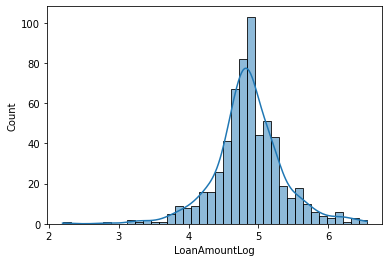

In [56]:
## now we check the data whether it still has skewness
## first we check for loan amount
sb.histplot(data=pre_dataset, x="LoanAmountLog", kde=True)

<AxesSubplot:xlabel='IncomeTotalLog', ylabel='Count'>

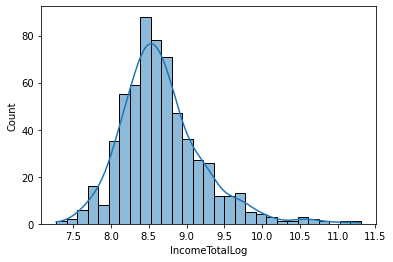

In [57]:
## checking for income 
sb.histplot(data=pre_dataset, x="IncomeTotalLog", kde=True)

In [288]:
## now we remove columns for which we have added normalized columns, like loanamountlog, totalincomelog
pre_dataset = pre_dataset.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'IncomeTotal'], axis = 1)

In [289]:
## after preprocessing data looks as follows
pre_dataset.head(2)

,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,Gender,Rural,Semiurban,LoanAmountLog,IncomeTotalLog
0,0,0,1,0,360.0,1.0,1,0,0,0,4.85203,8.674026
1,1,1,1,0,360.0,1.0,0,0,1,0,4.85203,8.714568


## Splitting Data into Independent, Dependent variables, and Train and Test Data

In [290]:
data_X = pre_dataset.drop('Loan_Status', axis = 1)  # data_X will contain the 'predictor' or the 'independent variables'

In [291]:
data_y = pre_dataset['Loan_Status'] # data_Y will contain the 'target' or the 'dependent variable'

In [292]:
## checking the data_X
data_X.head(1)

,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Gender,Rural,Semiurban,LoanAmountLog,IncomeTotalLog
0,0,0,1,0,360.0,1.0,0,0,0,4.85203,8.674026


In [293]:
## checking the data_Y
data_y.head(1)

0    1
Name: Loan_Status, dtype: int64

In [294]:
from sklearn.model_selection import train_test_split

In [295]:
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(data_X, data_y, test_size = 0.2, random_state = 7) 

# means 20% as test data and 80% as training data

In [296]:
## checking the shape of the X_train, y_train and test datasets
print("X_train_shape : {} , X_test_shape : {}\n".format(data_X_train.shape, data_X_test.shape))
print("y_train_shape : {} , y_test_shape : {}".format(data_y_train.shape, data_y_test.shape))

X_train_shape : (491, 11) , X_test_shape : (123, 11)

y_train_shape : (491,) , y_test_shape : (123,)


## Building Model

### Naive Bayes

In [297]:
## first we apply Naive Bayes algorithm

from sklearn.naive_bayes import GaussianNB
Naive_bayes_classifier = GaussianNB()
Naive_bayes_classifier.fit(data_X_train, data_y_train)
y_pred_nb = Naive_bayes_classifier.predict(data_X_test)
y_pred_nb ## see the predictions on test data

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [298]:
nb_acc = accuracy_score(data_y_train, Naive_bayes_classifier.predict(data_X_train))
print("Naive Bayes accuracy on train data : {0:.4f}".format(nb_acc*100))

Naive Bayes accuracy on train data : 80.0407


In [299]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [300]:
## defining a function for evaluating a model

def evaluate(data_y_test, y_pred, model_name) :
    print("{} Model Evaluation on test data".format(model_name))
    print("Accuracy : {0:.4f}".format(accuracy_score(data_y_test, y_pred)*100))
    print("Precision : {0:.4f}, Recall : {0:.4f}".format(precision_score(data_y_test, y_pred), recall_score(data_y_test, y_pred_nb)))
    print("F1-Score : {0:.4f}".format(f1_score(data_y_test, y_pred)))

In [301]:
evaluate(data_y_test, y_pred_nb, "Naive Bayes")

Naive Bayes Model Evaluation on test data
Accuracy : 82.9268
Precision : 0.8119, Recall : 0.8119
F1-Score : 0.8865


### Logistic Regression

In [312]:
from sklearn.linear_model import LogisticRegression
Logistic_reg_classifier = LogisticRegression(random_state = 7)
Logistic_reg_classifier.fit(data_X_train, data_y_train)
y_pred_lr = Logistic_reg_classifier.predict(data_X_test)
y_pred_lr ## see the predictions on test data

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [313]:
lr_acc = accuracy_score(data_y_train, Logistic_reg_classifier.predict(data_X_train))
print("Logistic Regression accuracy on train data : {0:.4f}".format(lr_acc*100))

Logistic Regression accuracy on train data : 80.2444


In [314]:
evaluate(data_y_test, y_pred_lr, "Logistic Regression")

Logistic Regression Model Evaluation on test data
Accuracy : 82.9268
Precision : 0.8119, Recall : 0.8119
F1-Score : 0.8865


### Decision Tree

In [309]:
from sklearn import tree
dt_classifier = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 7)
dt_classifier = dt_classifier.fit(data_X_train, data_y_train)
y_pred_dt = dt_classifier.predict(data_X_test)
y_pred_dt ## see the predictions on test data

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [310]:
dt_acc = accuracy_score(data_y_train, dt_classifier.predict(data_X_train))
print("Decision Tree accuracy on train data : {0:.4f}".format(dt_acc*100))

Decision Tree accuracy on train data : 100.0000


In [311]:
evaluate(data_y_test, y_pred_dt, "Decision Tree")

Decision Tree Model Evaluation on test data
Accuracy : 70.7317
Precision : 0.8077, Recall : 0.8077
F1-Score : 0.7778


### Random Forest

In [315]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state = 7)
rf_classifier.fit(data_X_train, data_y_train)
y_pred_rf = rf_classifier.predict(data_X_test)
y_pred_rf ## see the predictions on test data

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [316]:
rf_acc = accuracy_score(data_y_train, rf_classifier.predict(data_X_train))
print("Random Forest accuracy on train data : {0:.4f}".format(rf_acc*100))

Random Forest accuracy on train data : 100.0000


In [317]:
evaluate(data_y_test, y_pred_rf, "Random Forest")

Random Forest Model Evaluation on test data
Accuracy : 78.0488
Precision : 0.8065, Recall : 0.8065
F1-Score : 0.8475


### Support Vector Machine

In [324]:
from sklearn import svm
svm_classifier = svm.SVC(kernel='linear', random_state = 7)
svm_classifier.fit(data_X_train, data_y_train)
y_pred_svm =svm_classifier.predict(data_X_test)
y_pred_svm ## see the predictions on test data

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [325]:
svm_acc = accuracy_score(data_y_train, svm_classifier.predict(data_X_train))
print("Support Vector Machine accuracy on train data : {0:.4f}".format(svm_acc*100))

Support Vector Machine accuracy on train data : 80.4481


In [326]:
evaluate(data_y_test, y_pred_svm, "Support Vector Machine")

Support Vector Machine Model Evaluation on test data
Accuracy : 82.9268
Precision : 0.8119, Recall : 0.8119
F1-Score : 0.8865


##### Summary of Models  Accuracy on Test Data : 
#####  Naive Bayes : 82.9268
#####  Logistic Regression : 82.9268
#####  Decison Tree : 70.7317
#####  Random Forest : 78.0488
#####  Support Vector Machine : 82.9268

  ##### So, 3 models are giving same accuracy of approx. 83%, we choose the Naive Bayes model for real time predictions. 

## Making Sample Prediction


In [328]:
# Suppose we are given with the following parameters, so we apply these in a suitable manner to our model

gender = 'male'
married = 'yes'
dependents = 1
self_employeed = 'yes'
education = 'graduate'
credit_history = 'Yes'
property_area = 'Rural'
Applicant_income = 6000
CoApplicant_income = 1000
loanamount = 500
loanAmountterm = 312


rural = 0
semiurban = 0

if(credit_history == 'Yes') :
    credit_history = 1.0
else :
    credit_history = 0.0
    
if(married == 'Yes') :
    married = 1
else :
    married = 0    

if(gender == 'male') :
    gender = 0
else :
    gender = 1    

if(education == 'graduate') :
    education = 1
else :
    education = 0 

if(self_employeed == 'yes') :
    self_employeed = 1
else :
    self_employeed = 0
    
loanAmountterm = float(loanAmountterm)



if(property_area == 'rural') :
    rural = 1
    semiurban = 0
elif(property_area == 'semiurban') :
    rural = 0
    semiurban = 1

    
loanamountlog = np.log(loanamount)

incometotallog = np.log(Applicant_income+CoApplicant_income)


sample_data = (married, dependents, education, self_employeed,
               loanAmountterm, credit_history, gender, rural, semiurban, loanamountlog, incometotallog)

In [329]:
sample_data

(0, 1, 1, 1, 312.0, 1.0, 0, 0, 0, 6.214608098422191, 8.85366542803745)

In [340]:
def printres(model, sample) :
    if(model.predict(np.asarray(sample).reshape(1, -1)) == 1) :
        print('Loan Approved') 
    else :   
        print('Loan Not Approved')

In [342]:
print('Using Naive Bayes : ', end="")
printres(Naive_bayes_classifier, sample_data)
print('Using Logistic Regression : ', end="")
printres(Logistic_reg_classifier, sample_data)
print('Using Decision Tree : ', end="")
printres(dt_classifier, sample_data)
print('Using Random Forest : ', end="")
printres(rf_classifier, sample_data)
print('Using Support Vector Machine : ', end="")
printres(svm_classifier, sample_data)

Using Naive Bayes : Loan Approved
Using Logistic Regression : Loan Approved
Using Decision Tree : Loan Approved
Using Random Forest : Loan Approved
Using Support Vector Machine : Loan Approved


## Saving the Model

In [343]:
import pickle

In [348]:
pickle.dump(Naive_bayes_classifier, open('loan_model.pkl', 'wb'))